# Trabajo Práctico 1

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


 # Glosario columnas

-  operation: tipo de operacion (venta)
-  property type: tipo de propiedad (house, PH, apartment, store)
-  place_name: localidad de la propiedad.
-  place_with_parent_names: localidad junto a provinca, pais.
-  country_name: pais donde se encuentra la propiedad.
-  state_name: provincia donde se encuentra la propiedad.
-  geonames_id: número de identificación en la base de datos GeoNames.
-  lat-lon: latitud y longitud juntos.
-  lat: latidud.
-  lon: longitud.
-  price: precio de la propiedad en relacion a su moneda.
-  currency: moneda en la que se encuentra valorizada la propiedad.
-  price_aprox_local_currency: precio aproximado en pesos de la propiedad.
-  price_aprox_usd: precio aproximado del inmueble en dólares.
-  surface_total_in_m2: superficie total del inmueble en metros cuadrados.       
-  surface_covered_in_m2: superficie cubierta del inmueble en metros cuadrados.      
-  price_usd_per_m2: precio en dólares del metro cuadrado vs total m2.        
-  price_per_m2: precio, no se sabe en qué moneda.
-  floor: piso? no es claro, valores extraños.
-  rooms: cantidad de habitaciones.
-  expenses: valor de las expensas.
-  properati_url: url de la url de properati donde está publicado el inmueble.
-  description: descripción completa de todo el inmueble. Contiene información de todas las columnas y más.
-  title: título con el que se encuentra publicado. Aparece el tipo de propiedad, zona y alguna característica destacada como cantidad de ambientes.
-  image_thumbnail: fotos del inmueble.

In [136]:
#Leemos el dataset
data=pd.read_csv('./properatti.csv')

In [137]:
#Observamos as diferentes columnas, los tipos de datos y cuantos valos no nulos tienen estas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [138]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [139]:
#Tomamos una muestra para entender los valores del dataset
data.sample(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
22733,22733,sell,house,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.5997742,-60.6984572",-31.599774,...,300.0,330.000000,330.000000,NaN,NaN,NaN,http://www.properati.com.ar/17jnb_venta_casa_s...,SE VENDE CASA UBICADA SOBRE CALLE RISSO AL 300...,-VENDO CASA 3 DORM CON PATIO-,https://thumbs4.properati.com/7/kJMZIeBbXUTNiH...
110420,110420,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6101223,-58.4059406",-34.610122,...,90.0,1888.888889,1888.888889,NaN,4.0,NaN,http://www.properati.com.ar/1c46s_venta_depart...,"Departamento 4 AMBIENTES, muy luminoso. Living...",MUY LUMINOSO // SOLIS 500,https://thumbs4.properati.com/2/2VaDAR14ee-aqZ...
120389,120389,sell,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113.0,NaN,NaN,...,44.0,2336.469167,45447.727273,NaN,NaN,NaN,http://www.properati.com.ar/1chvd_venta_depart...,"Departamento 48m², Capital Federal, San Telmo,...",Departamento - San Telmo,NaN
20074,20074,sell,apartment,Berazategui,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,Bs.As. G.B.A. Zona Sur,3436042.0,"-34.7549361,-58.2036619",-34.754936,...,48.0,1297.000000,1567.208333,NaN,2.0,NaN,http://www.properati.com.ar/17bl9_venta_depart...,Altos de Sol es un complejo residencial desarr...,"ALTOS DE SOL! 2, 3 y 4 AMBIENTES! EXCELENTE MO...",https://thumbs4.properati.com/7/Wsqu6bcf_VUwPd...
35918,35918,sell,apartment,Monserrat,|Argentina|Capital Federal|Monserrat|,Argentina,Capital Federal,3430570.0,"-34.611025,-58.379084",-34.611025,...,30.0,NaN,2400.000000,5.0,2.0,NaN,http://www.properati.com.ar/18fpk_venta_depart...,Corredor Responsable: Martin Macagno - CUCICBA...,VENTA - Depto 2 amb (30m2) LATERAL - MONSERRAT,https://thumbs4.properati.com/1/nz51cSxpZ2ZiA1...
121083,121083,sell,house,San Miguel de Tucumán,|Argentina|Tucumán|San Miguel de Tucumán|,Argentina,Tucumán,3836873.0,NaN,NaN,...,200.0,1093.631650,19500.000000,NaN,NaN,NaN,http://www.properati.com.ar/1cj2k_venta_casa_s...,Hermosa casa construida en 2 plantas. 3 dormit...,Casa - San Miguel De Tucumán,https://thumbs4.properati.com/7/7IjFSeQarNjYci...
94129,94129,sell,apartment,Remedios de Escalada,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Remedi...,Argentina,Bs.As. G.B.A. Zona Sur,3429582.0,NaN,NaN,...,50.0,1335.426415,25240.000000,NaN,NaN,NaN,http://www.properati.com.ar/1bf3l_venta_depart...,"""EDIFICIO IBERLUCEA""Edificio de categoría de 9...",Departamento en Remedios De Escalada,https://thumbs4.properati.com/6/JanzuvA3_5NxQ_...
29274,29274,sell,house,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,NaN,...,170.0,1100.000000,1294.117647,NaN,3.0,NaN,http://www.properati.com.ar/17ykq_venta_casa_r...,"Casa ideal 2 familias en excelente zona, abajo...",Casa en Venta Ramos Mejia / La Matanza (A108 ...,https://thumbs4.properati.com/5/ECo3yIwA54du7-...
17624,17624,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.004877,-57.5450273",-38.004877,...,35.0,NaN,2142.857143,NaN,2.0,NaN,http://www.properati.com.ar/172e7_venta_depart...,DEPARTAMENTO 2 AMB. FRENTE ABIERTO CON VISTA A...,VENTA O ALQUILER NO ES APTO CREDITO,https://thumbs4.properati.com/6/FxWv9dbVly-S-4...
74406,74406,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,67.0,3566.342262,79724.358209,NaN,NaN,NaN,http://www.properati.com.ar/1aoxi_venta_depart...,EN CONSTRUCCION PALACIO ROCCATAGLIATA - VENTA ...,EN CONSTRUCCION PALACIO ROCCATAGLIATA - VENTA ...,https://thumbs4.properati.com/1/iGUh1TbFzvaVk6...


In [140]:
#sacar? vale la pena?
data['price_aprox_usd'].value_counts()

120000.00    1664
130000.00    1455
150000.00    1395
110000.00    1331
85000.00     1304
             ... 
269696.00       1
56827.45        1
261119.00       1
356663.00       1
584510.00       1
Name: price_aprox_usd, Length: 10364, dtype: int64

In [141]:
#sacar? vale la pena?
data['surface_total_in_m2'].value_counts()

50.0       1721
40.0       1698
45.0       1404
60.0       1396
70.0       1115
           ... 
881.0         1
1247.0        1
1983.0        1
943.0         1
25186.0       1
Name: surface_total_in_m2, Length: 1687, dtype: int64

In [142]:
# Porcentaje de nulls por columna
data.isnull().sum() * 100 / data.shape[0]

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [143]:
# Valores de operation 
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

In [144]:
# Drop operation porque tiene un solo valor
data.drop('operation',inplace=True, axis=1)

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


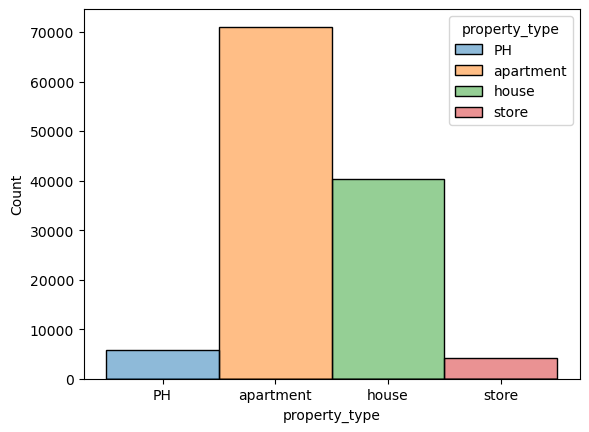

In [145]:
# Vemos 4 valores distintos de property_type. 
# La mayor cantidad de anuncios son de Apartment y House
print(data.property_type.value_counts())
sns.histplot( x="property_type", data=data, hue='property_type' )
plt.show()


In [146]:
# Valores de property_type
data.place_name.value_counts()

Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64

In [147]:
# Chequeo si todos los place_names son correctos en place_with_parent_names
# 23 --> a 23 registros le falta el place name
place_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['place_name'])) >= 0 else False, axis=1)
place_coincide.value_counts()

True     121197
False        23
dtype: int64

In [148]:
#Los que faltan son todos de Tigre
data[data['place_name'].isnull()]

,Unnamed: 0,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
6489,6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...
18622,18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,...,340.0,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...
21922,21922,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,-58.638405,...,220.0,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...
23664,23664,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800,...,294.0,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...
24722,24722,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778,...,270.0,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...
38856,38856,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659,...,550.0,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...
45970,45970,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,-58.637380,...,27.0,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICI

In [149]:
#Hay nombres de place_name que tiene espacios al principio/final del string
data['place_name'] = data['place_name'].apply(lambda x : str(x).strip())

In [150]:
# Chequeo si todos los state_names son correctos en place_with_parent_names.
# 121220 --> Todos OK 
state_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['state_name'])) >= 0 else False, axis=1)
state_coincide.value_counts()

True    121220
dtype: int64

In [151]:
# Chequeo si todos los country_names son correctos en place_with_parent_names
# 121220 --> Todos OK 
country_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['country_name'])) >= 0 else False, axis=1)
country_coincide.value_counts()

True    121220
dtype: int64

In [152]:
#Verificamos los diferentes valores de country_name
data['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [153]:
#Drop country_name porque tiene un solo valor
data.drop('country_name', inplace=True, axis=1)

In [154]:
# Chequeo de la cantidad de publicaciones por state_name ordenada.

data.columns
data_grouped = data.groupby(['state_name'])
display(data_grouped.describe().sort_values(by=('price_aprox_usd','count'), ascending=False)['price_aprox_usd'].round)

<bound method DataFrame.round of                                 count           mean           std       min  \
state_name                                                                     
Capital Federal               29018.0  269603.182879  4.575790e+05   5103.61   
Bs.As. G.B.A. Zona Norte      24058.0  324317.123170  3.772690e+05   5047.53   
Bs.As. G.B.A. Zona Sur        12085.0  198555.715572  2.260052e+05   6169.20   
Buenos Aires Costa Atlántica   9059.0  143430.988472  1.470750e+05   4952.45   
Córdoba                        9038.0  203624.244417  5.340228e+05      0.00   
Bs.As. G.B.A. Zona Oeste       7333.0  167545.648499  2.606546e+05   5000.00   
Santa Fe                       5413.0  139609.617118  2.937185e+05   4666.62   
Buenos Aires Interior          1814.0  183249.996582  1.983884e+05   6231.51   
Mendoza                         476.0  249705.485588  1.068573e+06   8973.38   
Corrientes                      470.0  206896.786681  1.864837e+05  32000.00   
Río Neg

In [164]:
#Verificamos los valores de currency
data['currency'].value_counts()

KeyError: 'currency'

In [157]:
#Verificamos el tipo de cambio y si el price_aprox_usd es correcto con respecto al price_aprox_local_currency

data["tipo_de_cambio"]=round(data.price_aprox_local_currency/data.price_aprox_usd,2)
print(f'Desvío tipo de cambio= ', data.tipo_de_cambio.std())
print(data['tipo_de_cambio'].value_counts())
print(f'Tipo de cambio nulos: ', data.tipo_de_cambio.isnull().sum())


Desvío tipo de cambio=  3.487005770896986e-11
17.64    100809
Name: tipo_de_cambio, dtype: int64
Tipo de cambio nulos:  20411


In [159]:
#Dropeamos currency, price_aprox_local_currency y price_per_m2 para dejar solo las columnas por dolares
data.drop(['currency','price_aprox_local_currency','price_per_m2'], inplace=True, axis=1)

<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

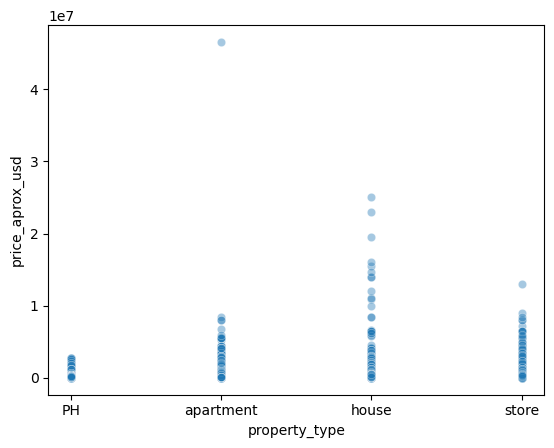

In [160]:
#Graficamos por property type y price_aprox_usd
#Pareceria haber outliers en Apartments > 4, houses > 2 y stores > 1
sns.scatterplot(data=data, x='property_type', y="price_aprox_usd", alpha=0.4)

<AxesSubplot:xlabel='property_type', ylabel='surface_total_in_m2'>

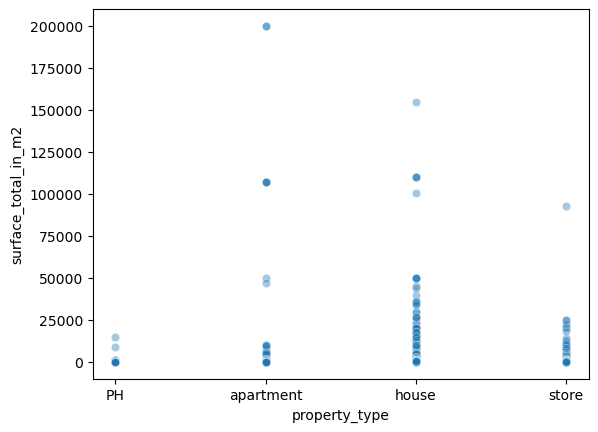

In [161]:
#Graficamos por property type y surface_total_in_m2
#Pareceria haber outliers en Apartments > 25000, houses > 100000 y stores > 75000
sns.scatterplot(data=data, x='property_type', y="surface_total_in_m2", alpha=0.4)

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

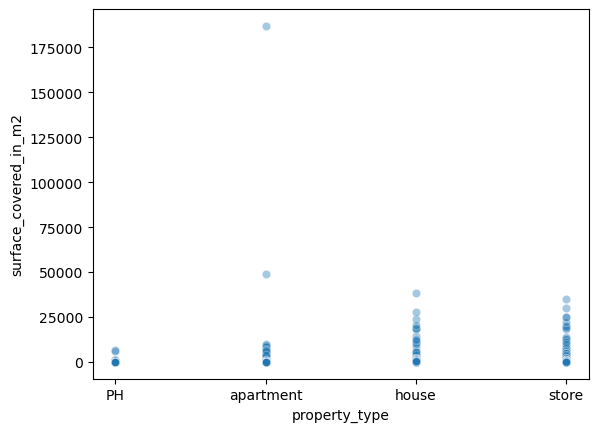

In [162]:
#Graficamos por property type y surface_covered_in_m2
#Pareceria haber outliers en Apartments > 50000
sns.scatterplot(data=data, x='property_type', y="surface_covered_in_m2", alpha=0.4)

In [163]:
#Prodiamos dropear las siguientes columnas porque no agregan valor
#image_thumbnail 
#properati_url